In [1]:
# https://www.data.go.kr/data/15061057/fileData.do
# 한글처리
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [2]:
url = 'https://raw.githubusercontent.com/leekyuyoung20230313/pythone/main/%EC%A0%84%EC%B2%98%EB%A6%AC/%EC%A3%BC%ED%83%9D%EB%8F%84%EC%8B%9C%EB%B3%B4%EC%A6%9D%EA%B3%B5%EC%82%AC_%EC%A0%84%EA%B5%AD%20%EC%8B%A0%EA%B7%9C%20%EB%AF%BC%EA%B0%84%EC%95%84%ED%8C%8C%ED%8A%B8%20%EB%B6%84%EC%96%91%EA%B0%80%EA%B2%A9%20%EB%8F%99%ED%96%A5_20220131.csv'
df = pd.read_csv(url,encoding='cp949')
df.head()

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015.0,10.0,5841
1,서울,전용면적 60제곱미터이하,2015.0,10.0,5652
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015.0,10.0,5882
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015.0,10.0,5721
4,서울,전용면적 102제곱미터초과,2015.0,10.0,5879


In [3]:
# 각 컬럼에 대한 데이터 타입을 조사
df = df.dropna(how='all') # 모든 row가 null인 데이터만 삭제
df[df['분양가격(제곱미터)'].isna()].head() # 확인용

,지역명,규모구분,연도,월,분양가격(제곱미터)
368,광주,전용면적 85제곱미터초과 102제곱미터이하,2016.0,2.0,NaN
369,광주,전용면적 102제곱미터초과,2016.0,2.0,NaN
374,대전,전용면적 102제곱미터초과,2016.0,2.0,NaN
388,강원,전용면적 85제곱미터초과 102제곱미터이하,2016.0,2.0,NaN
421,제주,전용면적 60제곱미터이하,2016.0,2.0,NaN


In [4]:
df['연도'] = df['연도'].astype(str)
df['월'] = df['월'].astype(str)

In [5]:
df['분양가격(제곱미터)'] = pd.to_numeric(df['분양가격(제곱미터)'] , errors = 'coerce') # 바꿀수 없는 타입을 만나면 na로 변경하고 처리

In [6]:
df['평당분양가격'] = df['분양가격(제곱미터)'] * 3.3

In [7]:
df.describe(include='all')

,지역명,규모구분,연도,월,분양가격(제곱미터),평당분양가격
count,6460,6460,6460,6460,5940.000000,5940.000000
unique,17,5,8,12,NaN,NaN
top,서울,모든면적,2016.0,10.0,NaN,NaN
freq,380,1292,1020,595,NaN,NaN
mean,NaN,NaN,NaN,NaN,3500.593939,11551.960000
std,NaN,NaN,NaN,NaN,1432.953236,4728.745678
min,NaN,NaN,NaN,NaN,1868.000000,6164.400000
25%,NaN,NaN,NaN,NaN,2596.000000,8566.800000
50%,NaN,NaN,NaN,NaN,3104.000000,10243.200000
75%,NaN,NaN,NaN,NaN,3957.250000,13058.925000


In [8]:
# 결측치를 채우는 방법?
df.head()

,지역명,규모구분,연도,월,분양가격(제곱미터),평당분양가격
0,서울,모든면적,2015.0,10.0,5841.0,19275.3
1,서울,전용면적 60제곱미터이하,2015.0,10.0,5652.0,18651.6
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015.0,10.0,5882.0,19410.6
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015.0,10.0,5721.0,18879.3
4,서울,전용면적 102제곱미터초과,2015.0,10.0,5879.0,19400.7


In [9]:
grouped = df.groupby(['지역명','규모구분','연도']).transform('mean')
grouped['분양가격(제곱미터)']
df['분양가격(제곱미터)'].fillna(grouped['분양가격(제곱미터)'],inplace=True)
df['평당분양가격'].fillna(grouped['평당분양가격'],inplace=True)

<ipython-input-9-159586f9bafb>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = df.groupby(['지역명','규모구분','연도']).transform('mean')


In [10]:
df.dropna(inplace=True)

In [11]:
df.reset_index(drop=True,inplace=True)

In [12]:
# 전국 분양 가격 동향
df.pivot_table('평당분양가격','규모구분','연도')

연도,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0
규모구분,,,,,,,,
모든면적,8893.047059,9293.042647,9927.322059,10673.695588,11540.730882,12289.410294,13706.889706,14170.976471
전용면적 102제곱미터초과,9837.226667,10565.093627,11373.334804,11665.858073,13330.830469,13679.253361,14994.990312,15285.820000
전용면적 60제곱미터이하,8951.525000,9425.813725,10222.448950,10939.995313,11402.618950,12362.968750,13027.549118,13196.311765
전용면적 60제곱미터초과 85제곱미터이하,8891.817647,9295.986765,9840.438235,10648.605882,11609.125000,12277.892647,13644.416176,14230.570588
전용면적 85제곱미터초과 102제곱미터이하,9518.506250,9914.751471,10533.684219,11177.399444,12750.296429,14211.664107,13747.288318,15146.057143


In [13]:
# 규모구분이 전체인 데이터만 조회
df_year =  df[df['규모구분'] == '모든면적']
df_region_year = df_year.pivot_table('평당분양가격','지역명','연도')
df_region_year['변동액'] = (df_region_year['2022.0'] - df_region_year['2015.0']).astype(int)
df_region_year

연도,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,변동액
지역명,,,,,,,,,
강원,7159.9,7011.125,7170.625,7680.750,8141.650,9331.300,9716.850,10002.3,2842
경기,10377.4,11220.000,11840.675,13185.975,14468.850,14383.325,14183.125,15071.1,4693
경남,7585.6,7847.950,8163.925,9019.450,9870.850,10160.700,10505.000,10936.2,3350
경북,7170.9,7360.650,7802.575,8505.200,8856.650,9544.975,10333.400,10880.1,3709
광주,8052.0,8898.725,9471.000,9855.725,11822.800,12500.125,14020.875,14576.1,6524
대구,9232.3,10310.025,11507.100,12075.800,13852.025,15145.075,15558.125,15981.9,6749
대전,8098.2,8501.625,9056.025,10180.225,11777.700,11094.050,11914.100,13157.1,5058
부산,10307.0,10429.925,11663.575,12997.875,13116.400,13247.575,14645.675,16945.5,6638
서울,19725.2,20663.500,21425.250,22889.350,26131.050,26910.125,30115.250,31620.6,11895


In [14]:
df_region_year['변동액'] = (df_region_year['2022.0'] - df_region_year['2015.0']).astype(int)
region_year_max =   np.argmax(df_region_year['변동액'])
region_year_min =   np.argmin(df_region_year['변동액'])
region_year_mean =   np.mean(df_region_year['변동액'])

In [15]:
df_region_year.iloc[region_year_max].변동액

14288.0

In [16]:
name = df_region_year.iloc[region_year_max].name
price = df_region_year.iloc[region_year_max].변동액
print(f"2015년부터 2022년까지 분양가는 계속 상승했으며 상승폭이 가장 큰 지역은 { name }이며 상승액은 평당 {price } 이다")

name = df_region_year.iloc[region_year_min].name
price = df_region_year.iloc[region_year_min].변동액
print(f"2015년부터 2022년까지 분양가는 계속 상승했으며 상승폭이 가장 적은 지역은 {name }이며 상승액은 평당 {price } 이다")
print(f"전국 평균 평당 변동 분양가는 {region_year_mean} 이다")

2015년부터 2022년까지 분양가는 계속 상승했으며 상승폭이 가장 큰 지역은 제주이며 상승액은 평당 14288.0 이다
2015년부터 2022년까지 분양가는 계속 상승했으며 상승폭이 가장 적은 지역은 충북이며 상승액은 평당 2429.0 이다
전국 평균 평당 변동 분양가는 5277.35294117647 이다


In [17]:
# 연도별 변동 그래프
# 런타임 재시작 이후
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [24]:
df_year

,지역명,규모구분,연도,월,분양가격(제곱미터),평당분양가격
0,서울,모든면적,2015.0,10.0,5841.0,19275.3
5,인천,모든면적,2015.0,10.0,3163.0,10437.9
10,경기,모든면적,2015.0,10.0,3138.0,10355.4
15,부산,모든면적,2015.0,10.0,3112.0,10269.6
20,대구,모든면적,2015.0,10.0,2682.0,8850.6
...,...,...,...,...,...,...
6239,전북,모든면적,2022.0,1.0,2842.0,9378.6
6244,전남,모든면적,2022.0,1.0,2997.0,9890.1
6248,경북,모든면적,2022.0,1.0,3297.0,10880.1
6253,경남,모든면적,2022.0,1.0,3314.0,10936.2


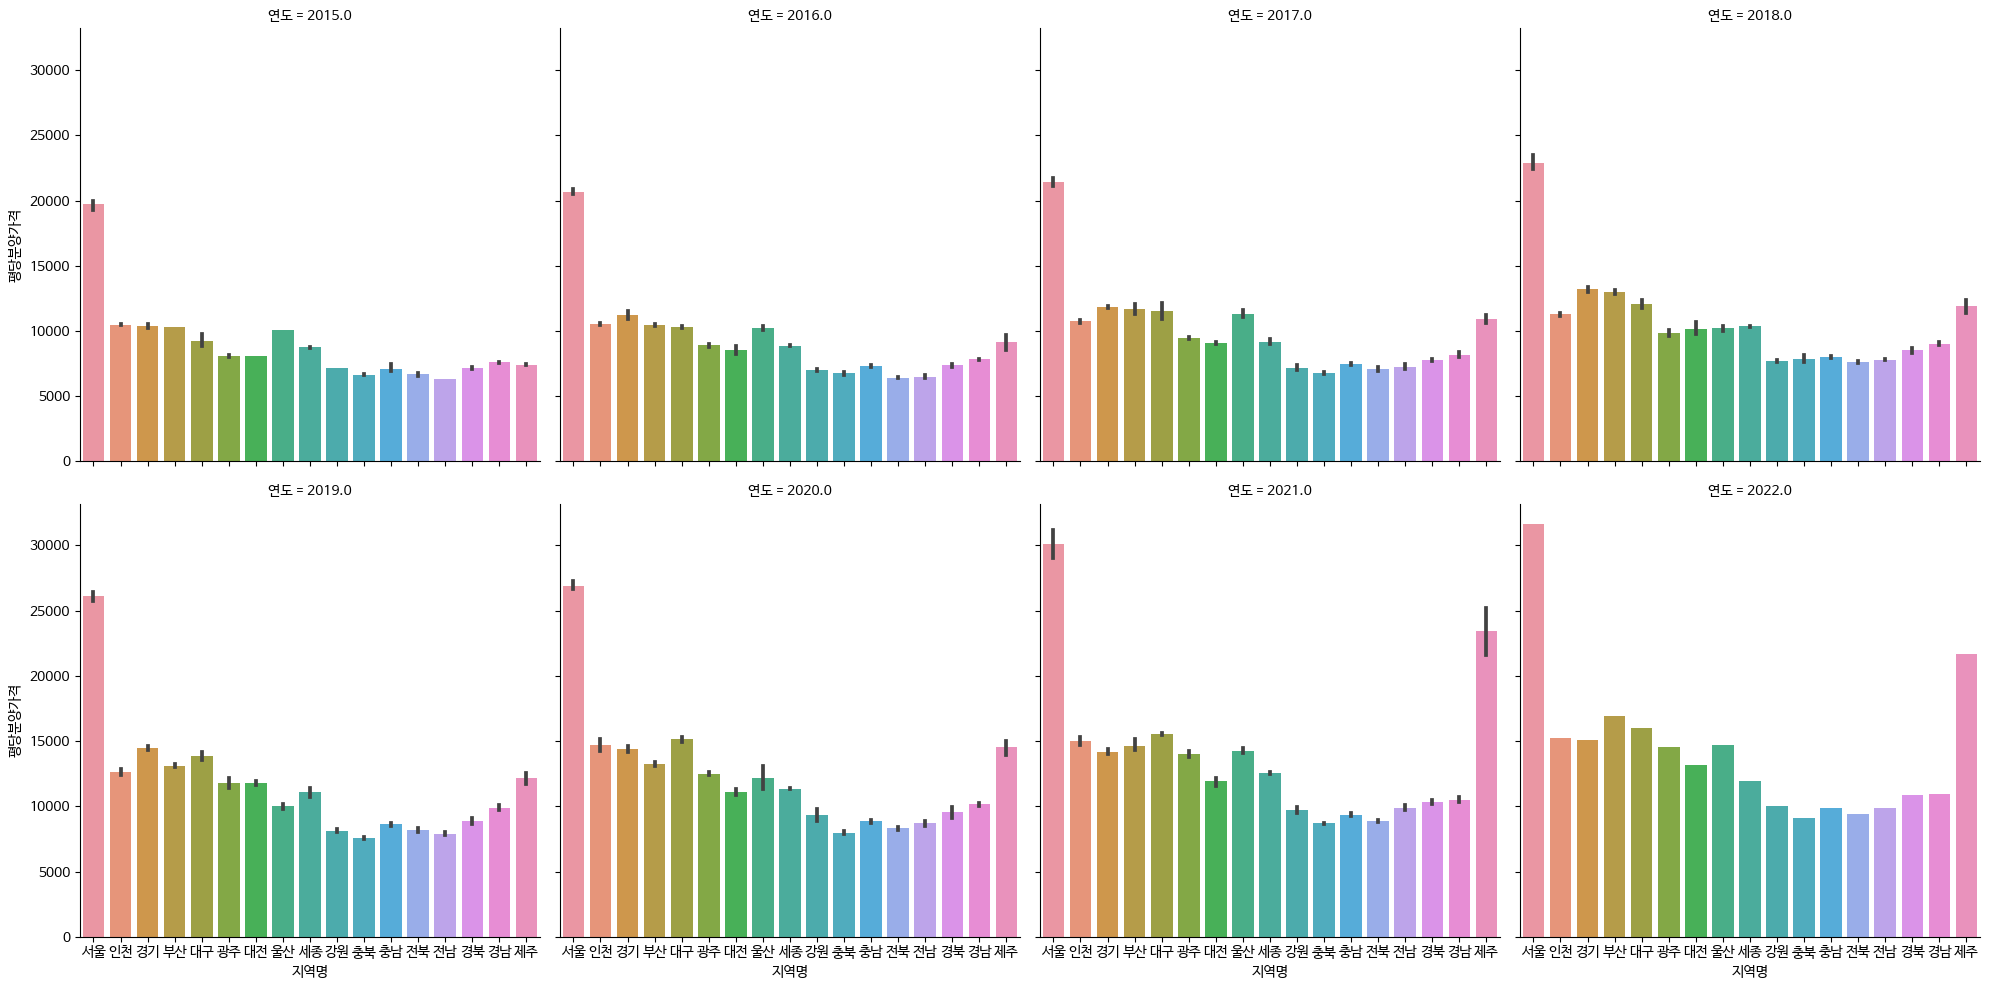

In [23]:
import seaborn as sns
# x:지역 y:평당분양 , hue =연도
# sns.barplot(data=df_year, x = '지역명', y = '평당분양가격', hue = '연도' )
sns.catplot(data=df_year, x = '지역명', y = '평당분양가격', col = '연도' ,col_wrap =4,kind='bar')

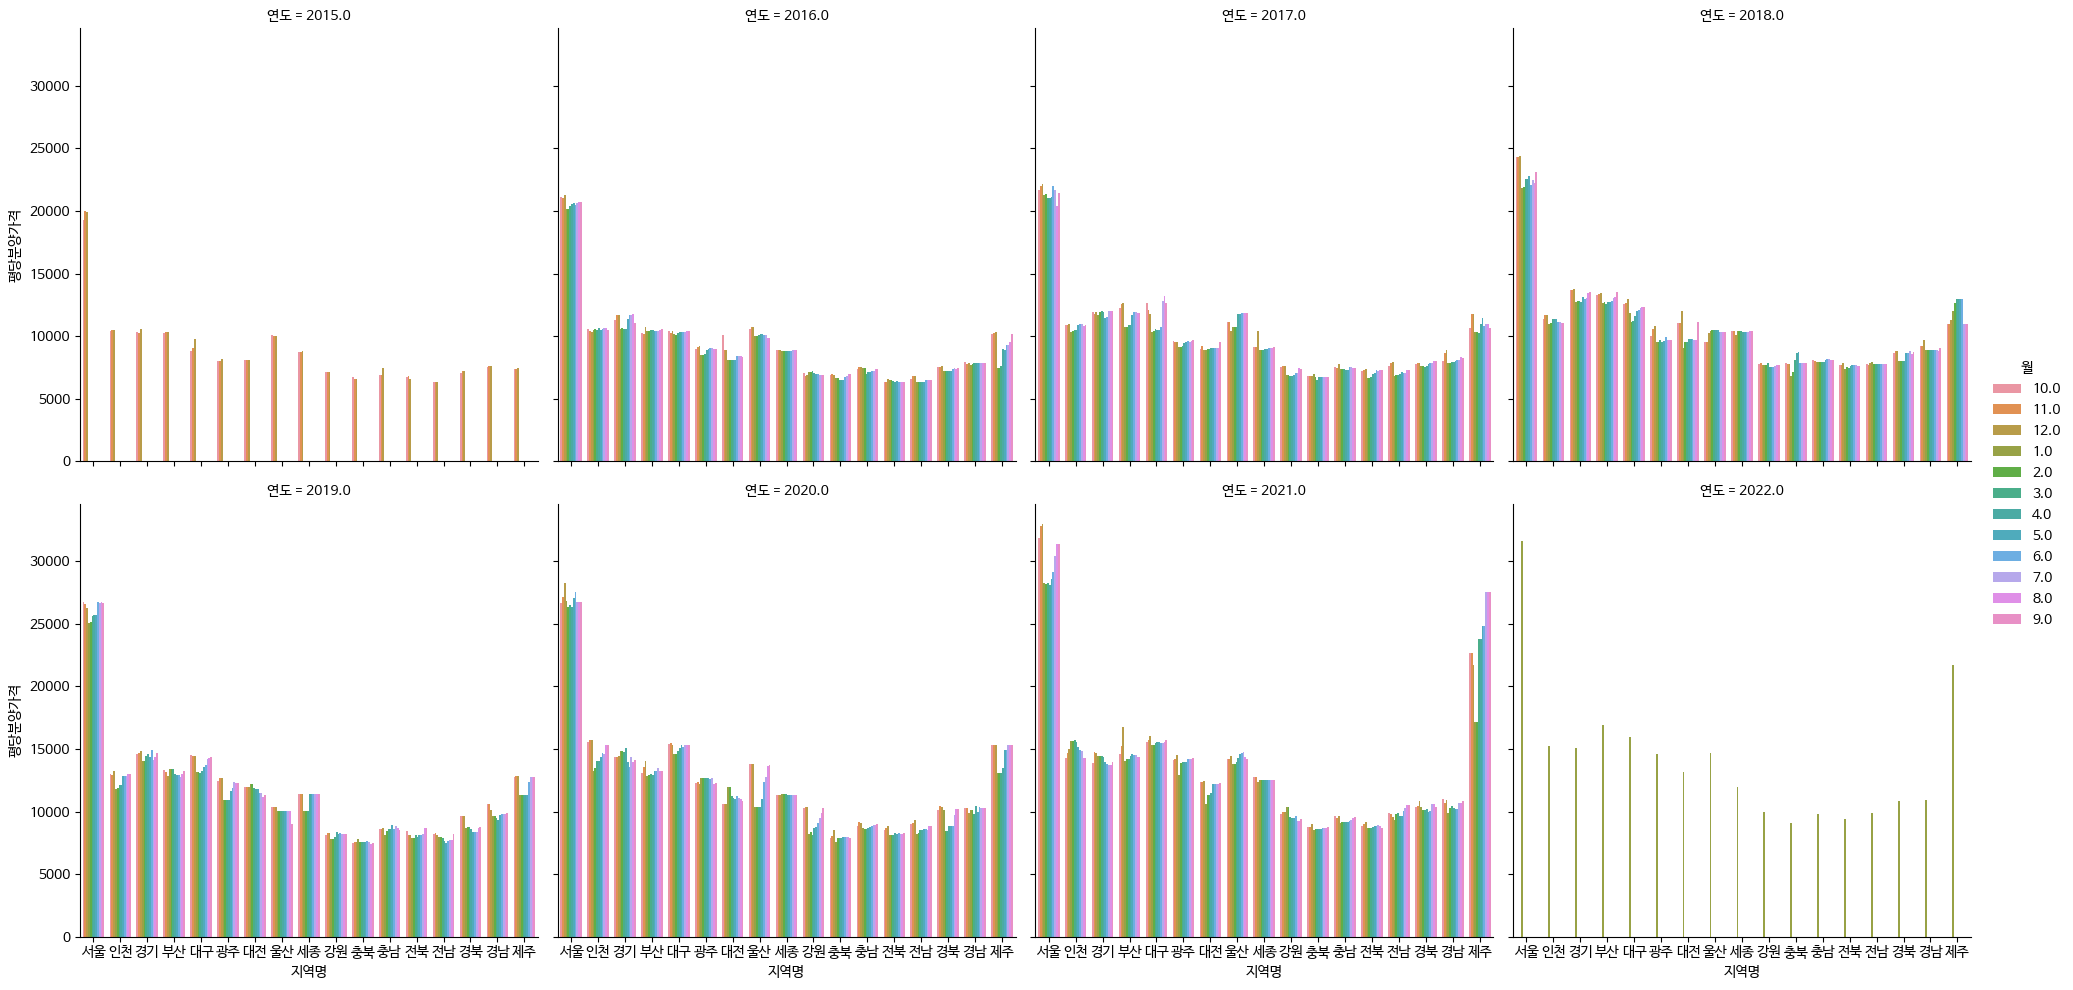

In [25]:
sns.catplot(data=df_year, x = '지역명', y = '평당분양가격', hue = '월', col = '연도' ,col_wrap =4,kind='bar')

In [26]:
df_region_year.T

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2015.0,7159.900,10377.400,7585.600,7170.900,8052.000,9232.300,8098.200,10307.000,19725.200,8750.500,10052.900,10484.100,6317.300,6703.40,7405.200,7114.800,6645.100
2016.0,7011.125,11220.000,7847.950,7360.650,8898.725,10310.025,8501.625,10429.925,20663.500,8860.500,10208.550,10532.500,6488.625,6417.95,9129.175,7330.675,6770.225
2017.0,7170.625,11840.675,8163.925,7802.575,9471.000,11507.100,9056.025,11663.575,21425.250,9133.025,11327.525,10749.475,7245.700,7074.65,10907.325,7455.800,6770.225
2018.0,7680.750,13185.975,9019.450,8505.200,9855.725,12075.800,10180.225,12997.875,22889.350,10354.850,10241.400,11273.900,7789.100,7625.75,11890.725,8012.675,7874.075
2019.0,8141.650,14468.850,9870.850,8856.650,11822.800,13852.025,11777.700,13116.400,26131.050,11078.925,10022.100,12634.875,7902.400,8196.65,12137.950,8606.950,7574.600
2020.0,9331.300,14383.325,10160.700,9544.975,12500.125,15145.075,11094.050,13247.575,26910.125,11355.300,12202.850,14674.000,8696.875,8317.10,14540.900,8856.100,7959.600
2021.0,9716.850,14183.125,10505.000,10333.400,14020.875,15558.125,11914.100,14645.675,30115.250,12561.175,14274.975,14991.625,9907.700,8838.50,23423.950,9345.600,8681.200
2022.0,10002.300,15071.100,10936.200,10880.100,14576.100,15981.900,13157.100,16945.500,31620.600,11926.200,14671.800,15265.800,9890.100,9378.60,21694.200,9834.000,9075.000
변동액,2842.000,4693.000,3350.000,3709.000,6524.000,6749.000,5058.000,6638.000,11895.000,3175.000,4618.000,4781.000,3572.000,2675.00,14288.000,2719.000,2429.000


In [ ]:
# 각각의 지역별로   x 연도  y 평균 분양가  plot으로 표현